2024-01-31 00:56:58.789920: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-31 00:57:02.059611: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 00:57:02.059702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 00:57:02.315394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 00:57:02.707771: I tensorflow/core/platform/cpu_feature_guar

4/4 [==============================] - 0s 2ms/step


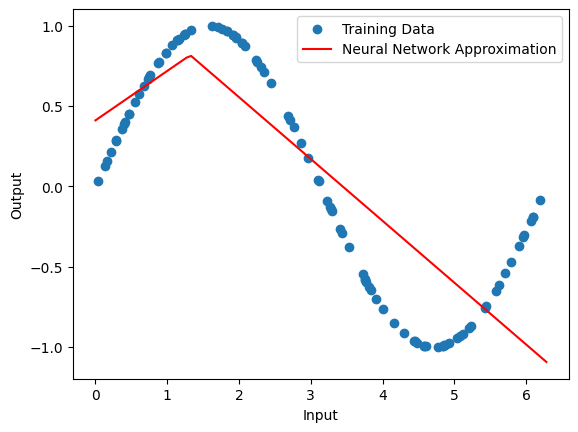

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_train = np.random.rand(100, 1) * 2 * np.pi
y_train = np.sin(X_train)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(1),
    ]
)

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=1000, verbose=0)

X_test = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.scatter(X_train, y_train, label="Training Data")
plt.plot(X_test, y_pred, color="red", label="Neural Network Approximation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

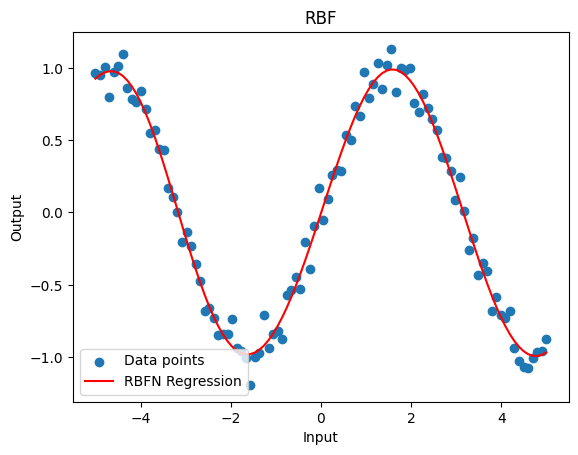

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)
def rbf_kernel_function(x, c, s):
    rbf = np.exp(-0.5 * ((x - c) / s)**2)
    return rbf
def train():
    centers = np.linspace(-5, 5, 10)
    widths = 1.0
    rbf_kernel=rbf_kernel_function(X, centers, widths)
    phi = np.column_stack([rbf_kernel for c in centers])
    weights = np.linalg.lstsq(phi, y, rcond=None)[0]
    y_pred = phi.dot(weights)
    return y_pred
y_pred=train()
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='RBFN Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('RBF')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


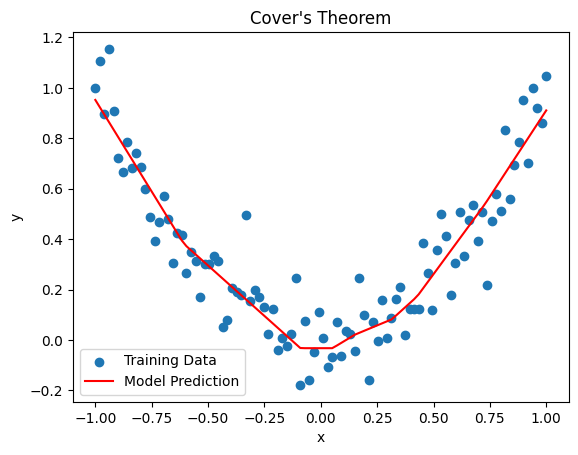

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def create_datasets():
    x_train = np.linspace(-1, 1, 100).reshape(-1, 1)
    y_train = x_train**2 + np.random.normal(0, 0.1, size=x_train.shape)
    return x_train, y_train

def train_model(x_train, y_train):
    model = tf.keras.Sequential([ tf.keras.layers.Dense(10, activation="relu", input_shape=(1,)), tf.keras.layers.Dense(1),])
    model.compile(optimizer="adam", loss="mse")
    model.fit(x_train, y_train, epochs=1000, verbose=0)
    return model

def plot_results(x_train, y_train, x_test, y_pred):
    plt.scatter(x_train, y_train, label="Training Data")
    plt.plot(x_test, y_pred, color="red", label="Model Prediction")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Cover's Theorem")
    plt.show()

x_train, y_train = create_datasets()
model = train_model(x_train, y_train)
y_pred = model.predict(np.linspace(-1, 1, 100).reshape(-1, 1))

plot_results(x_train, y_train, np.linspace(-1, 1, 100).reshape(-1, 1), y_pred)

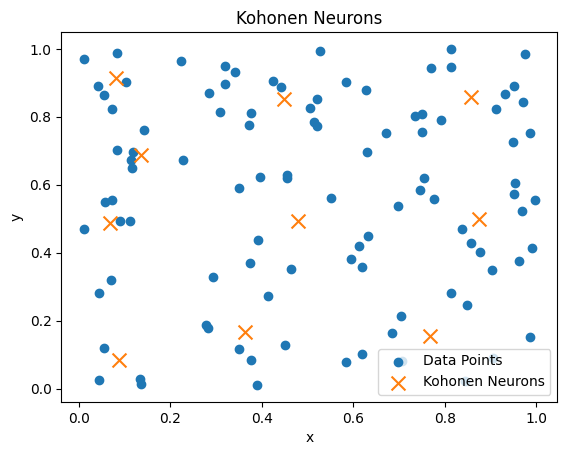

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class KohonenNetwork:
    def __init__(self, input_size, output_size, learning_rate, epochs):
        self.weights = np.random.rand(output_size, input_size)
        self.data_points = np.random.rand(100, input_size)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train_model(self):
        for _ in range(self.epochs):
            for data_point in self.data_points:
                winner_index = np.argmin(np.linalg.norm(self.weights - data_point, axis=1))
                self.weights[winner_index] += self.learning_rate * (data_point - self.weights[winner_index])
        return self.data_points, self.weights

input_size = 2
output_size = 10
learning_rate = 0.1
epochs = 100

kohonen = KohonenNetwork(input_size, output_size, learning_rate, epochs)
data_points, weights = kohonen.train_model()

plt.scatter(data_points[:, 0], data_points[:, 1], label="Data Points")
plt.scatter(weights[:, 0], weights[:, 1], marker="x", s=100, label="Kohonen Neurons")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kohonen Neurons")
plt.show()

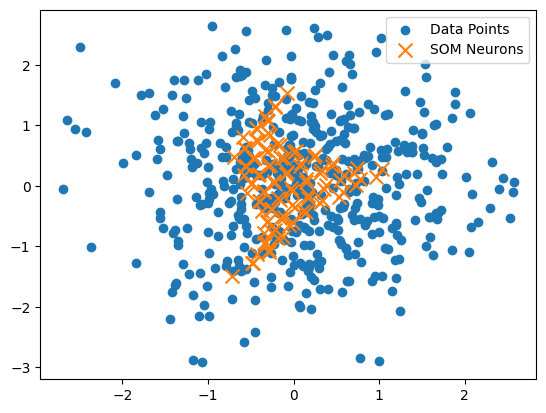

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Som:
    def __init__(self, grid_size, epochs):
        self.weights = np.random.rand(grid_size, grid_size, 2)
        self.data_points = np.random.randn(500, 2)
        self.epochs = epochs

    def train(self, learning_rate=0.1):
        for _ in range(self.epochs):
            for data_point in self.data_points:
                winner = np.argmin(np.linalg.norm(self.weights - data_point, axis=2))
                neighborhood = np.exp(-np.linalg.norm(np.indices((grid_size, grid_size)).T- np.unravel_index(winner, (grid_size, grid_size)),axis=2,)/ 2)
                self.weights += (learning_rate* neighborhood[:, :, np.newaxis]* (data_point - self.weights))
        return self.data_points, self.weights

grid_size = 10
epochs = 100

som = Som(grid_size, epochs)
_, weights = som.train()

plt.scatter(som.data_points[:, 0], som.data_points[:, 1], label="Data Points")
plt.scatter(weights[:, :, 0], weights[:, :, 1], marker="x", s=100, label="SOM Neurons")
plt.legend()
plt.show()